# 911 Data analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [12]:
t=pd.read_csv('/Users/Tanvi/Desktop/911.csv')

In [13]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [15]:
t.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Top 5 Zipcodes for 911 Calls

In [16]:
t['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# Top 5 Area(twp) for 911 calls

In [18]:
t['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [20]:
t['title'].nunique()

110

In [22]:
t['Reason']=t['title'].apply(lambda title:title.split(':')[0])

# Most Common Reason for 911 calls

In [25]:
t['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

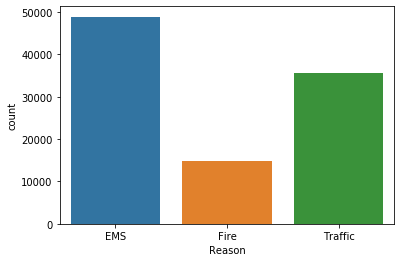

In [26]:
sns.countplot(x='Reason',data = t)

In [29]:
t['timeStamp']=pd.to_datetime(t['timeStamp'])

After Converting the STR data type of timeStamp to Datetime.I have created 3 New columns where TimeStamp can be divided into Hour,Month,Day of Week.Creating new column will help in understanding the 911 calls in more details.

In [33]:
t['Hour']=t['timeStamp'].apply(lambda time:time.hour)
t['Month']=t['timeStamp'].apply(lambda time:time.month)
t['Day of Week']=t['timeStamp'].apply(lambda time:time.dayofweek)

In [37]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
t['Day of Week']=t['Day of Week'].map(dmap)

Most 911 calls are on Friday and reason is EMS 

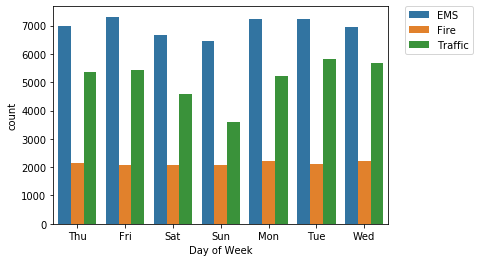

In [41]:
sns.countplot(x='Day of Week',hue='Reason',data=t)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Similarly after analyzing the day of week I performed Monthly 911 call plot.

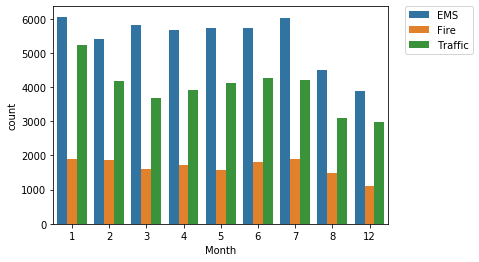

In [42]:
sns.countplot(x='Month',hue='Reason',data=t)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

After ploting bar plot we can see that there are some months that cannot be seen in the above graph.Right lind of plot need to be used to display all the months.

In [43]:
bymonth=t.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


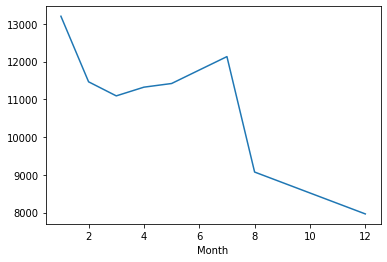

In [44]:
bymonth['twp'].plot()

In [45]:
t['Date']=t['timeStamp'].apply(lambda t:t.date())

In [ ]:
t.index=pd.DatetimeIndex(t.timeStamp)

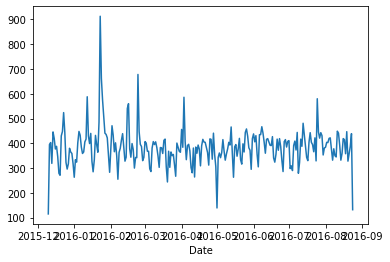

In [46]:
t.groupby('Date').count()['twp'].plot()

Text(0.5, 1.0, 'TRAFFIC')

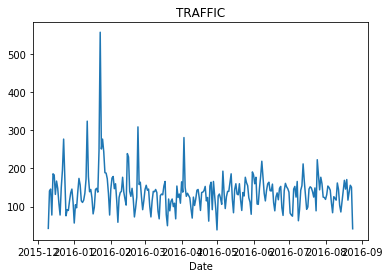

In [47]:
t[t['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('TRAFFIC')

Text(0.5, 1.0, 'Fire')

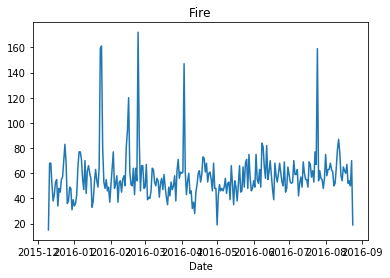

In [48]:
t[t['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

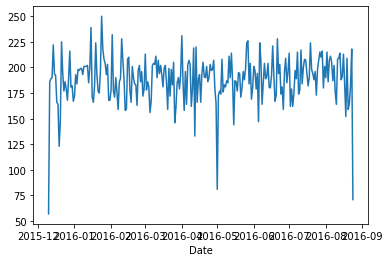

In [49]:
t[t['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [50]:
dayHour = t.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


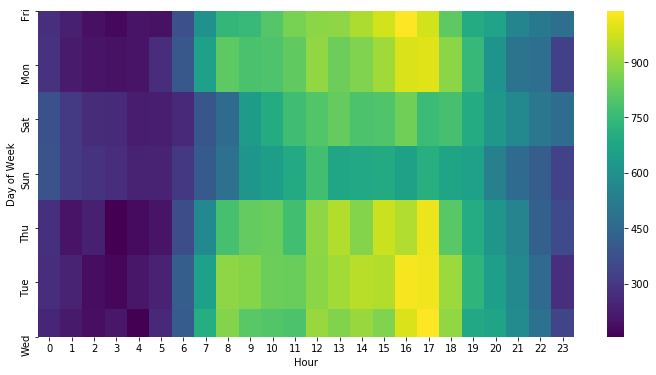

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
